## Observations and Insights 

In [220]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import pprint 
import numpy as np
pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(stuff)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [221]:
# Checking the number of mice.
namesofmice = combined_df["Mouse ID"].unique()
numbofmice = len(namesofmice)
numbofmice

249

In [222]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
bool_series = combined_df.duplicated(subset=["Mouse ID","Timepoint"])    

 


In [223]:
##### Optional: Get all the data for the duplicate mouse ID. 

bad_mice = combined_df[bool_series]
bad_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [224]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = combined_df.drop_duplicates(subset=["Mouse ID","Timepoint"]) 
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [225]:
# Checking the number of mice in the clean DataFrame.
namesofmice = mouse_df["Mouse ID"].unique()
numbofmice = len(namesofmice)
numbofmice

249

## Summary Statistics

In [226]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, medi an, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#trim down df and group by Drug Regimen
regimine_volume_df = mouse_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
reg_grp = regimine_volume_df.groupby("Drug Regimen")



In [227]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = reg_grp.agg([np.mean, np.median, np.var, np.std,st.sem])    
summary_stats



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

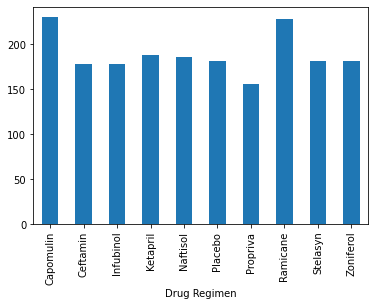

In [228]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_df.groupby(['Drug Regimen']).size().plot(kind = "bar")


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64


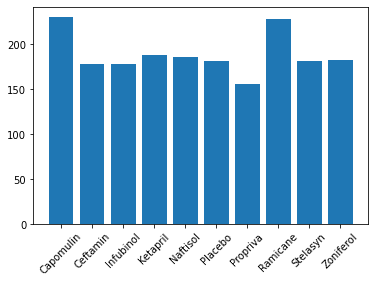

In [229]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
group =  mouse_df.groupby(['Drug Regimen']).size()
print(group)
x_axis = np.arange(len(group))
plt.bar(x_axis,group)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='45')
plt.show()

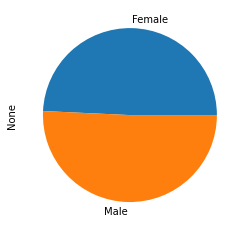

In [230]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_df.groupby(['Sex']).size().plot(kind = "pie")


,0
Sex,
Female,930
Male,958


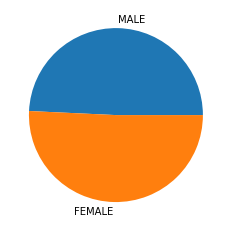

In [231]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = mouse_df.groupby(["Sex"]).size()
gender_df = pd.DataFrame(gender)

plt.pie(gender,labels = ["MALE", "FEMALE"])
gender_df

## Quartiles, Outliers and Boxplots

In [232]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = pd.DataFrame(mouse_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint':'max_timepoint'})
max_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(mouse_df, max_time_df, on = "Mouse ID")
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [233]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin','Ramicane','Inubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
drug_values = []



    
    
    
    
    
     
    
    

    
for drug in drugs:
    # add subset
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
# Locate the rows which contain mice on each drug and get the tumor volumes      
  
    final_volume_df = temp_df.loc[temp_df["Timepoint"] == temp_df['max_timepoint']]
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq 
    print(f'IQR for {drug}: {iqr}')
    
   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
# Determine outliers using upper and lower bounds     
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'number of {drug} outliers: {outliers_count}')
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
number of Ramicane outliers: 0
IQR for Inubinol: nan
Lower Bound for Inubinol: nan
Upper Bound for Inubinol: nan
number of Inubinol outliers: 0
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
number of Ceftamin outliers: 0


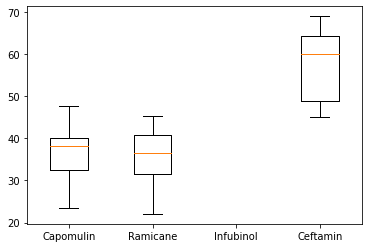

In [234]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_values)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

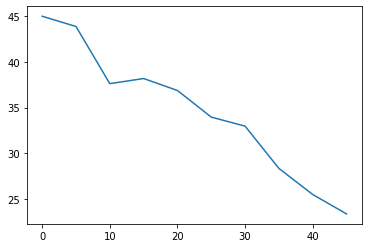

In [235]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = mouse_df.loc[mouse_df['Mouse ID'] == 's185']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])


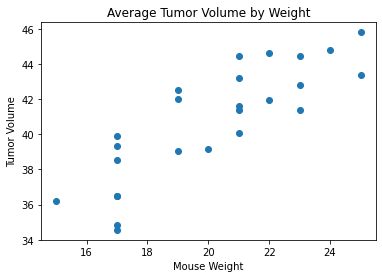

In [236]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_df.loc[mouse_df["Drug Regimen"] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})


avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on="Mouse ID")
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']
plt.title('Average Tumor Volume by Weight')
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.scatter(x,y)


## Correlation and Regression

In [239]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
orrelation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.
